Text Analysis – One of the most popular projects in the industry. Every customer facing industry (retail, telecom, finance, etc.) is interested in identifying their customers’ sentiment, whether they think positive or negative about them.

Python sentiment analysis is a methodology for analyzing a piece of text to discover the sentiment hidden within it. It accomplishes this by combining machine learning and natural language processing (NLP). Sentiment analysis allows you to examine the feelings expressed in a piece of text.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

In [18]:
data= pd.read_csv("G:/NLP Project/Whatsapp_new.csv")

In [19]:
data.tail()

,Date,Comments,Group_Name,Rand
10491,NaN,Poa bro uzuri pia unajua Mike Dean anatoka soon😂😂,Politics,0.888462
10492,NaN,Na hio story imekanyagiwa lakini. Ingekua othe...,football,0.254666
10493,NaN,"SINYEI,the surest bet.",Politics,0.771938
10494,NaN,Indeed. One of the 2st century anthems.,football,0.799729
10495,NaN,Bro hapo Umesema ukweli kabisa.🫱🏿‍🫲🏿,football,0.789575


In [20]:
data= data.drop(['Date','Rand'], axis=1)
data

,Comments,Group_Name
0,????ama Wacha niende tu...na wakugawe mitre 100,Politics
1,Power to be restored in the next ten minutes s...,Politics
2,Naturing*,football
3,itted>,football
4,The seat is reserved for Meshack Kiplagat @25...,Politics
...,...,...
10491,Poa bro uzuri pia unajua Mike Dean anatoka soon😂😂,Politics
10492,Na hio story imekanyagiwa lakini. Ingekua othe...,football
10493,"SINYEI,the surest bet.",Politics
10494,Indeed. One of the 2st century anthems.,football


In [21]:
data['Group_Name'].value_counts()

Politics    5365
football    5118
Name: Group_Name, dtype: int64

In [22]:
sentiment_label = data.Group_Name.factorize()
sentiment_label

(array([0, 0, 1, ..., 0, 1, 1], dtype=int64),
 Index(['Politics', 'football'], dtype='object'))

In [23]:
Whats_Text = data.Comments.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(Whats_Text)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(Whats_Text)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [24]:
print(tokenizer.word_index)

{'the': 1, 'to': 2, 'na': 3, 'and': 4, 'ni': 5, 'is': 6, 'a': 7, 'you': 8, 'of': 9, 'in': 10, 'ya': 11, 'for': 12, 'i': 13, 'we': 14, 'he': 15, 'are': 16, 'will': 17, 'be': 18, 'that': 19, 'hii': 20, 'it': 21, 'so': 22, 'all': 23, 'not': 24, 'this': 25, 'but': 26, 'kwa': 27, 'on': 28, 'with': 29, 'your': 30, 'sonko': 31, 'good': 32, 'was': 33, 'hio': 34, 'have': 35, 'tu': 36, 'his': 37, 'si': 38, 'from': 39, 'as': 40, 'time': 41, 'team': 42, 'has': 43, 'sana': 44, 'they': 45, 'sasa': 46, 'people': 47, 'what': 48, 'wa': 49, 'who': 50, 'do': 51, 'kama': 52, 'him': 53, 'man': 54, 'bro': 55, 'sawa': 56, 'wewe': 57, 'haha': 58, 'our': 59, 'best': 60, 'one': 61, 'no': 62, 'ata': 63, 'season': 64, 'ndio': 65, 'ama': 66, 'at': 67, 'am': 68, 'pia': 69, 'watu': 70, 'or': 71, 'if': 72, 'players': 73, 'us': 74, 'lakini': 75, 'know': 76, 'can': 77, "don't": 78, 'like': 79, 'ndo': 80, 'mtu': 81, 'kuna': 82, 'u': 83, 'my': 84, 'them': 85, '😆': 86, '😂😂😂': 87, 'me': 88, 'should': 89, 'how': 90, 'chelse

In [25]:
print(Whats_Text[6000])
print(encoded_docs[6000])

Safi mweshimiwa
[231, 802]


In [26]:
print(padded_sequence[1000])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
   68 

In [27]:
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           515392    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 200, 32)          0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 50)                16600     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 532,043
Trainable params: 532,043
Non-trainable params: 0
________________________________________________

In [28]:
history= model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
263/263 [==============================] - 63s 232ms/step - loss: 0.6038 - accuracy: 0.6532 - val_loss: 0.4047 - val_accuracy: 0.7962
Epoch 2/5
263/263 [==============================] - 60s 228ms/step - loss: 0.3510 - accuracy: 0.8377 - val_loss: 0.3230 - val_accuracy: 0.8548
Epoch 3/5
263/263 [==============================] - 58s 221ms/step - loss: 0.2536 - accuracy: 0.8869 - val_loss: 0.3037 - val_accuracy: 0.8667
Epoch 4/5
263/263 [==============================] - 59s 223ms/step - loss: 0.2077 - accuracy: 0.9032 - val_loss: 0.3058 - val_accuracy: 0.8614
Epoch 5/5
263/263 [==============================] - 59s 224ms/step - loss: 0.1734 - accuracy: 0.9171 - val_loss: 0.3225 - val_accuracy: 0.8633


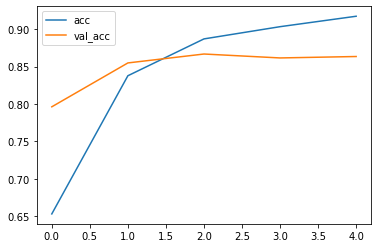

<Figure size 432x288 with 0 Axes>

In [29]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

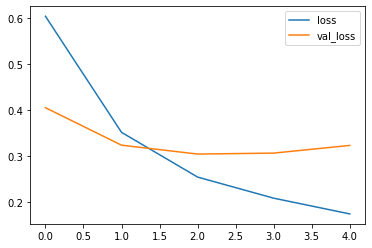

<Figure size 432x288 with 0 Axes>

In [30]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plot.jpg")

In [31]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])

In [32]:
T_Sentence1 = "Nikam jama waliambiwa wajifunge juuuu apana😂 2 OG kwani hawajui net ikoo pande gani"
predict_sentiment(T_Sentence1)

T_Sentence2 = "Mitrovic not red carded on that career threatening challenge against Gueye lakini ingekua mlami🤦🏾‍♂️"
predict_sentiment(T_Sentence2)

1/1 [==============================] - 0s 423ms/step
Predicted label:  football
1/1 [==============================] - 0s 38ms/step
Predicted label:  football
